In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

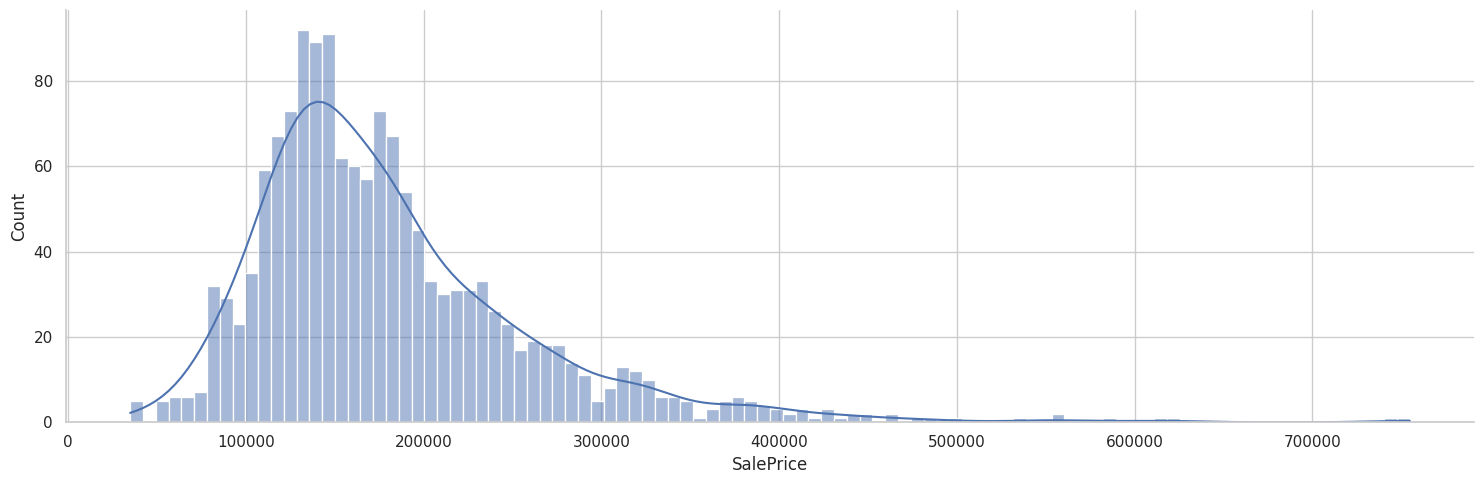

In [5]:
sns.displot(train, x='SalePrice', aspect=3, bins=100, kde=True);

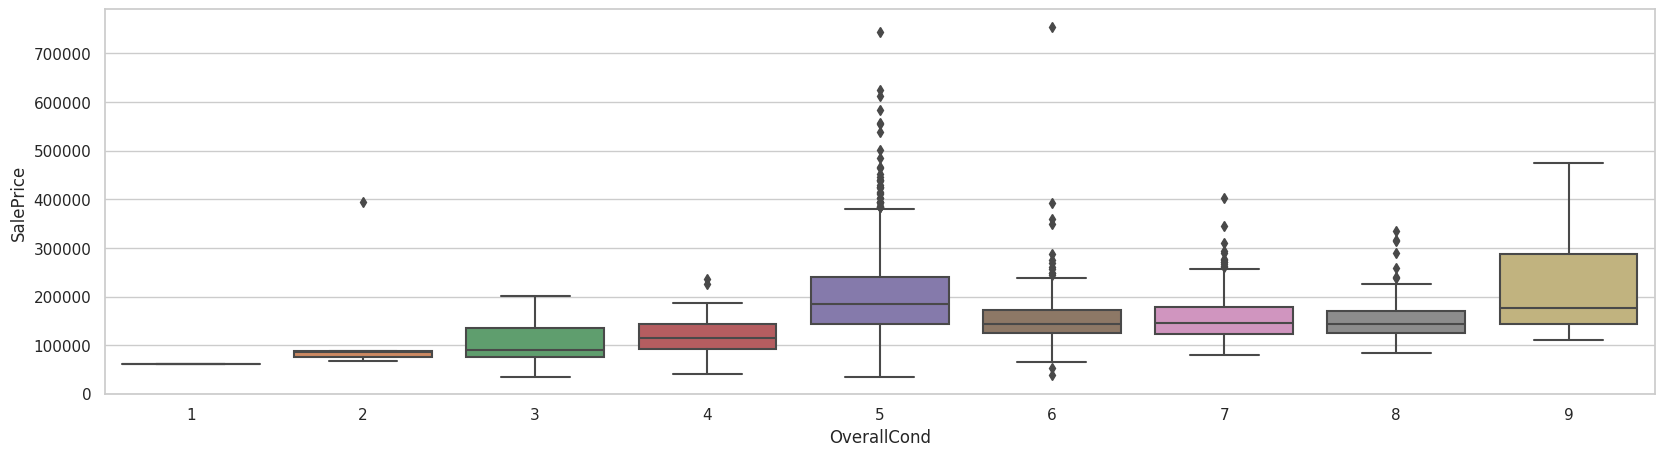

In [6]:
plt.figure(figsize=(20,5))
sns.boxplot(train, y='SalePrice', x='OverallCond');

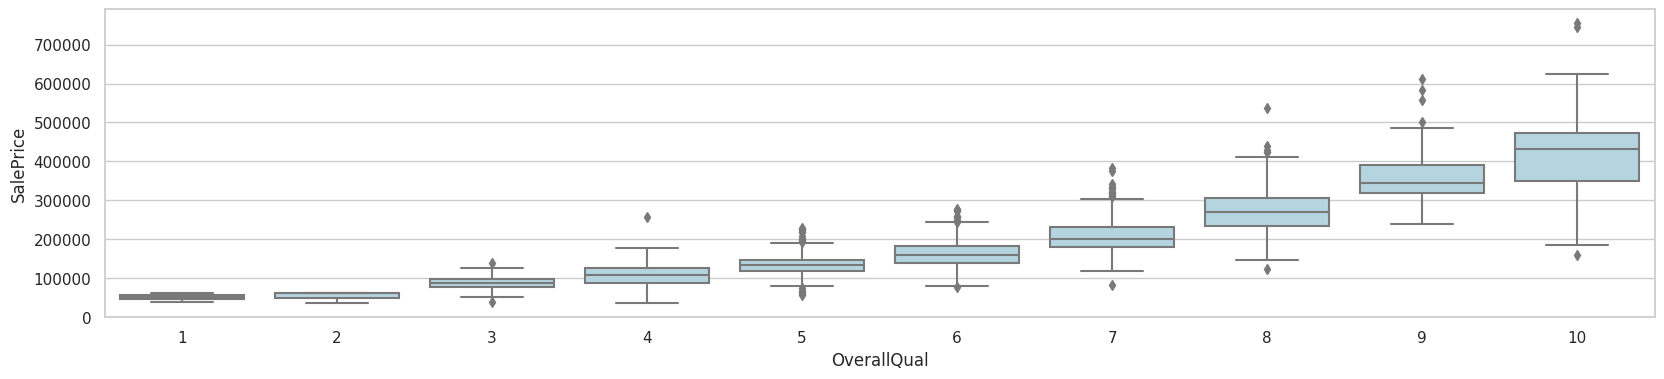

In [41]:
plt.figure(figsize=(20,4))
sns.boxplot(train, y='SalePrice', x='OverallQual', color='lightblue');

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

y = train['SalePrice']
X = train[features]

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=5)

In [11]:
hp_model = DecisionTreeRegressor()

In [14]:
hp_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [15]:
pred_y = hp_model.predict(test_X)

In [17]:
pred_y[:5]

array([227875., 262000., 190000., 108000., 135000.])

In [18]:
test_y.head()

756     212000
923     193000
1423    274970
217     107000
653     135000
Name: SalePrice, dtype: int64

In [20]:
mean_absolute_error(test_y, pred_y)

28792.668493150686

In [21]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=5)
    
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    
    mae = mean_absolute_error(test_y, pred_y)
    return mae    

In [31]:
maes = []
idx = []

for max_leaf_nodes in range(90, 110, 1):
    this_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print(f'Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {this_mae}')
    maes.append(this_mae)
    idx.append(max_leaf_nodes)

maeseries = pd.Series(data=maes, index=idx)    

Max leaf nodes: 90 		 Mean Absolute Error: 24978.58879730825
Max leaf nodes: 91 		 Mean Absolute Error: 25102.091243394647
Max leaf nodes: 92 		 Mean Absolute Error: 25074.69257813297
Max leaf nodes: 93 		 Mean Absolute Error: 25107.546565896246
Max leaf nodes: 94 		 Mean Absolute Error: 25141.08416768403
Max leaf nodes: 95 		 Mean Absolute Error: 25021.993756725125
Max leaf nodes: 96 		 Mean Absolute Error: 24733.223208779917
Max leaf nodes: 97 		 Mean Absolute Error: 24649.06841425937
Max leaf nodes: 98 		 Mean Absolute Error: 24641.022817390483
Max leaf nodes: 99 		 Mean Absolute Error: 24649.02908555155
Max leaf nodes: 100 		 Mean Absolute Error: 24584.86785294187
Max leaf nodes: 101 		 Mean Absolute Error: 24610.014884905333
Max leaf nodes: 102 		 Mean Absolute Error: 24763.689614194314
Max leaf nodes: 103 		 Mean Absolute Error: 24763.790585551727
Max leaf nodes: 104 		 Mean Absolute Error: 24763.790585551727
Max leaf nodes: 105 		 Mean Absolute Error: 24754.191145698132
Max leaf

<AxesSubplot:>

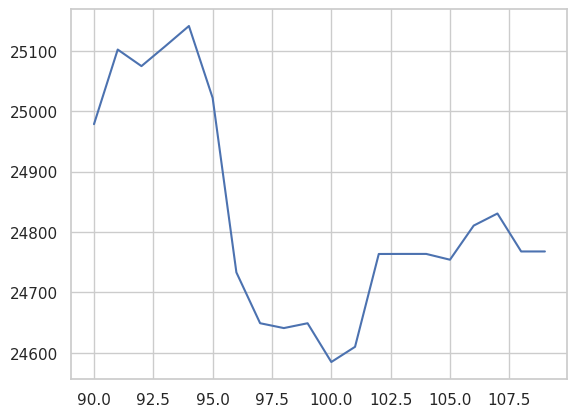

In [32]:
sns.lineplot(maeseries)

In [30]:
maeseries.min()

24584.86785294187

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
f_model = RandomForestRegressor(random_state=1)

f_model.fit(train_X, train_y)
pred_y = f_model.predict(test_X)
print(mean_absolute_error(test_y, pred_y))

20346.30346692759


### trying to improve by adding features:

In [83]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [49]:
train['Alley'].fillna('None', inplace=True)

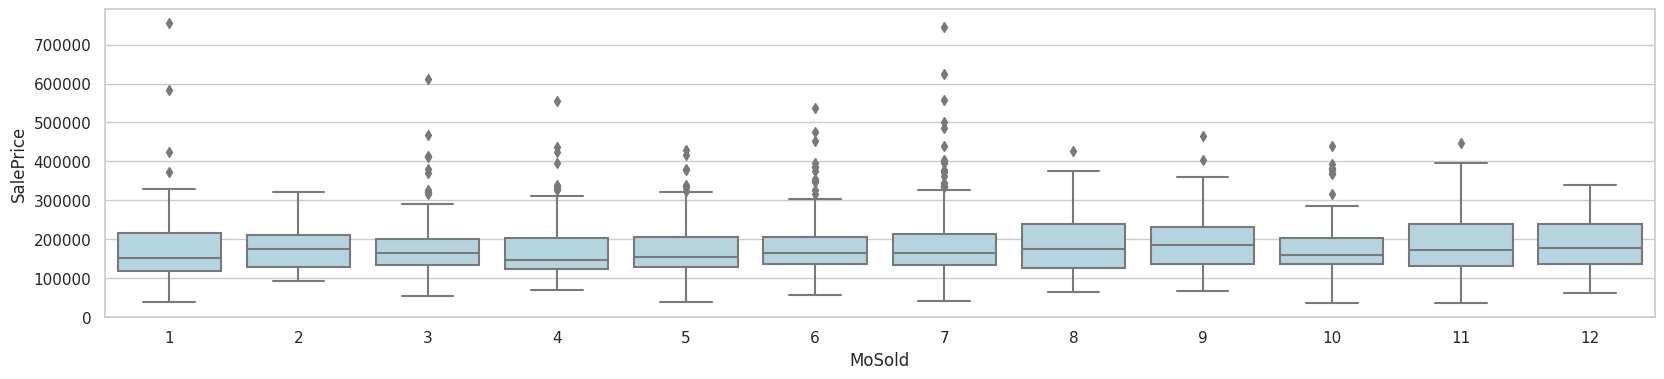

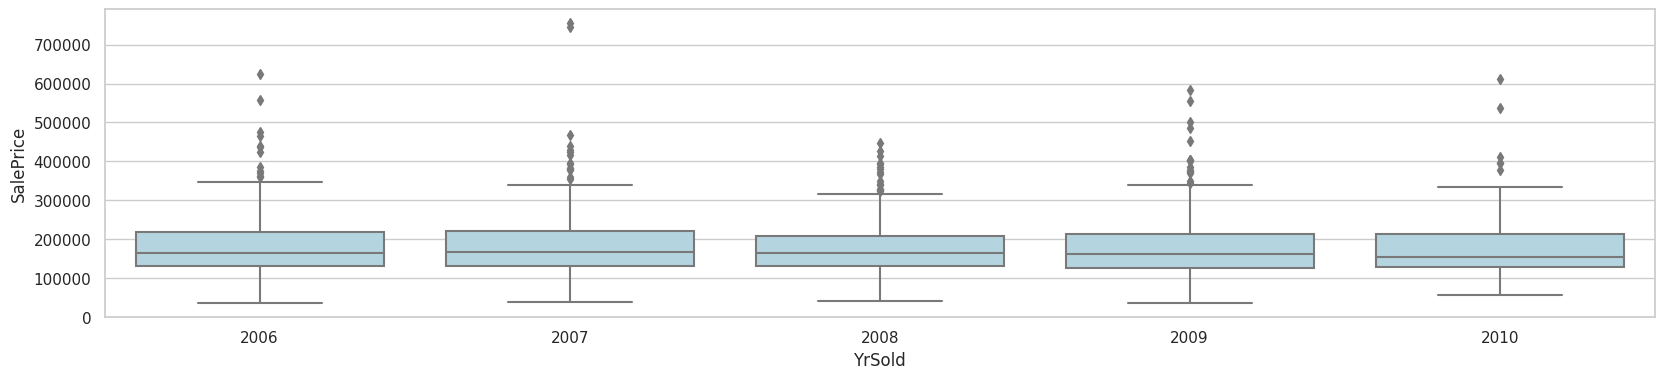

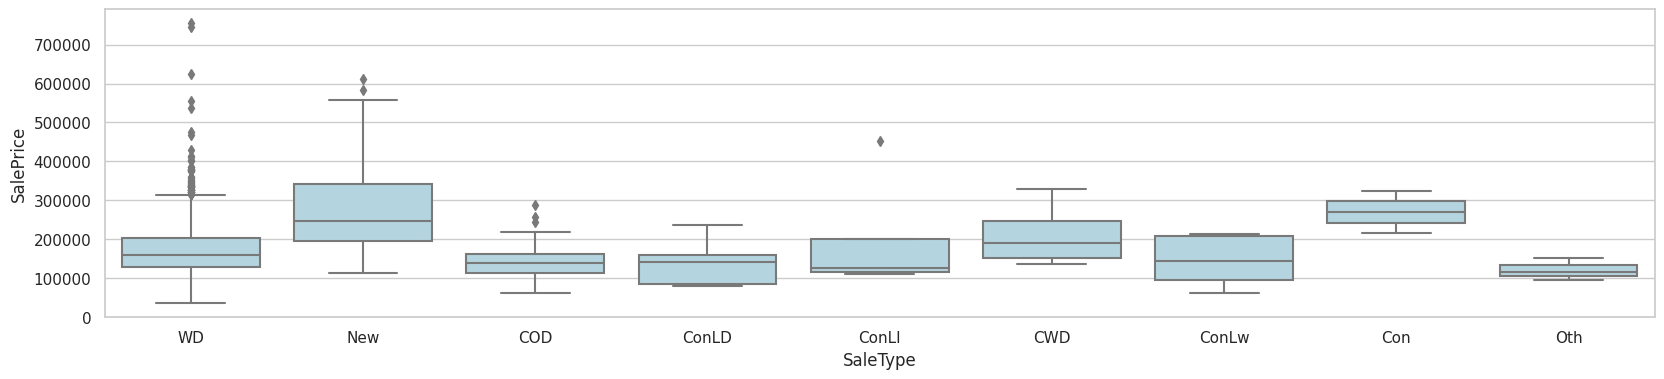

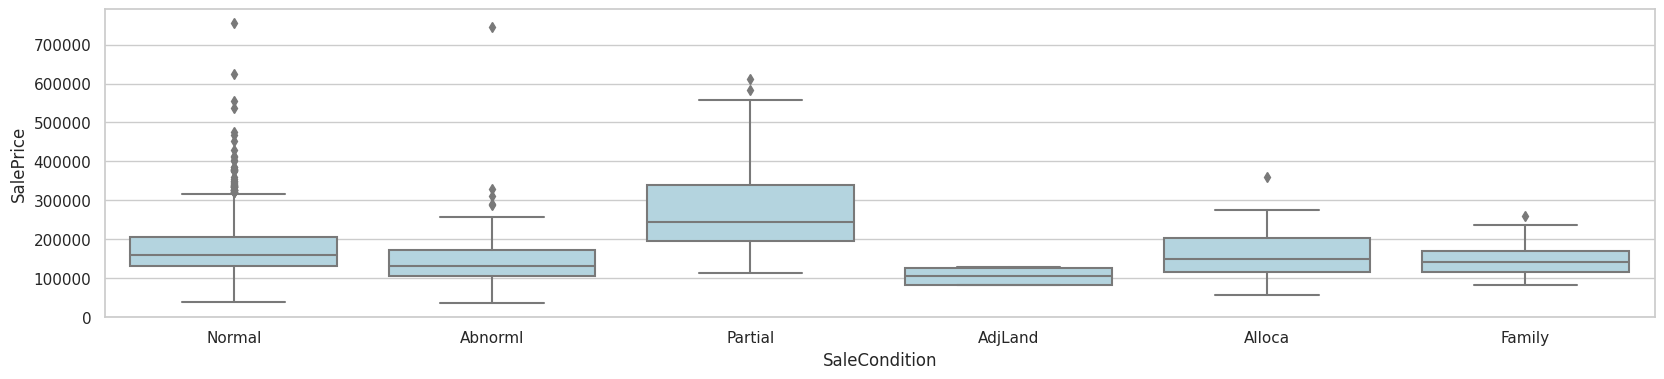

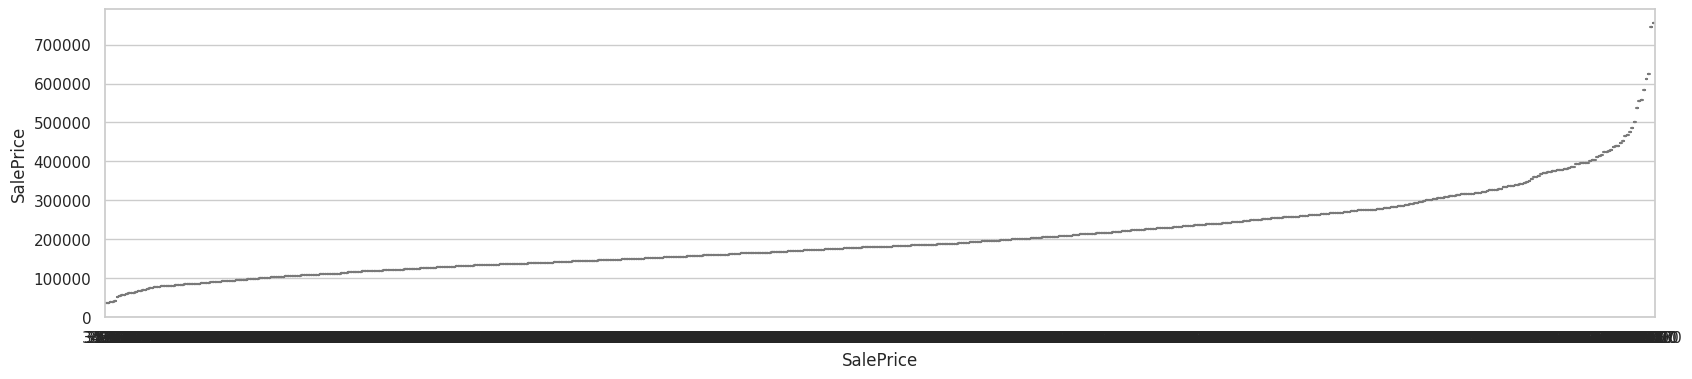

In [89]:
for i, col in enumerate(train.columns[76:]):
    plt.figure(i, figsize=(20,4))
    sns.boxplot(train, y='SalePrice', x=col, color='lightblue');

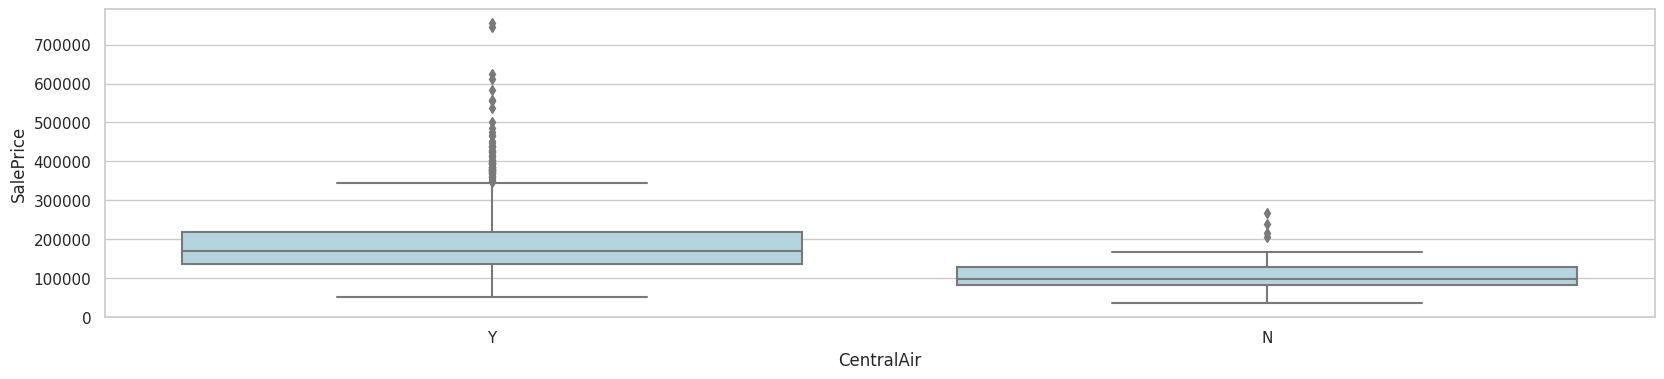

In [103]:
plt.figure(figsize=(20,4))
sns.boxplot(train, y='SalePrice', x='CentralAir', color='lightblue');

In [108]:
# features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
# features = [OverallQual, YearBuilt, BsmtQual, BsmtCond, 
#             CentralAir, GrLivArea, FullBath, KitchenQual, TotRmsAbvGrd, Fireplaces, PoolArea]

features = ['OverallQual', 'YearBuilt', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
           'LotArea', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr']

y = train['SalePrice']
X = train[features]

In [109]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=5)

In [110]:
rfmodel = RandomForestRegressor(random_state=5)

rfmodel.fit(train_X, train_y)

RandomForestRegressor(random_state=5)

In [111]:
pred_y = rfmodel.predict(test_X)
print(mean_absolute_error(test_y, pred_y))

19187.33268271363


In [118]:
fullmodel = RandomForestRegressor()

test = test[features]

fullmodel.fit(X, y)

RandomForestRegressor()

In [119]:
predictions = fullmodel.predict(test)

In [122]:
predictions

array([125133.  , 146863.5 , 177922.94, ..., 152663.69, 119054.  ,
       235033.4 ])

In [123]:
test

,OverallQual,YearBuilt,GrLivArea,TotRmsAbvGrd,Fireplaces,PoolArea,LotArea,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr
0,5,1961,896,5,0,0,11622,896,0,1,2
1,6,1958,1329,6,0,0,14267,1329,0,1,3
2,5,1997,1629,6,1,0,13830,928,701,2,3
3,6,1998,1604,7,1,0,9978,926,678,2,3
4,8,1992,1280,5,0,0,5005,1280,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1092,5,0,0,1936,546,546,1,3
1455,4,1970,1092,6,0,0,1894,546,546,1,3
1456,5,1960,1224,7,1,0,20000,1224,0,1,4
1457,5,1992,970,6,0,0,10441,970,0,1,3


In [126]:
output = pd.DataFrame({'Id': test.index + 1461,
                      'SalePrice': predictions})

output.to_csv('./mysubmission.csv', index=False)